In [1]:
import sys

from gp_sinkhorn.SDE_solver import solve_sde_RK
from gp_sinkhorn.MLE_drift import *
from gp_sinkhorn.utils import plot_trajectories_2


import copy
import torch
import math
import numpy as np

from celluloid import Camera
from IPython.display import HTML
import matplotlib.pyplot as plt

#  IPFP

In [6]:
num_samples = 200
X_0 = torch.distributions.normal.Normal(loc=0, scale=0.5).sample((num_samples, 1)) #.reshape(num_samples, dim,-1)

X_1_a = torch.distributions.normal.Normal(loc=-7, scale=0.6**2).sample((num_samples//2, 1)) 
X_1_b = torch.distributions.normal.Normal(loc=-12, scale=0.6**2).sample((num_samples//2, 1))
X_1 = torch.cat((X_1_a,X_1_b))

In [7]:
prior_X_0=torch.cat((X_1,X_0))
prior_X_0.shape
# prior_X_0 = None

torch.Size([400, 1])

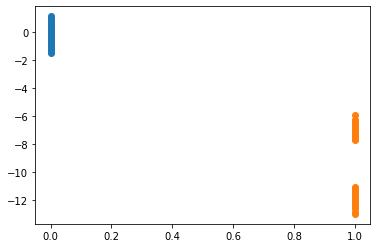

In [8]:
plt.scatter([0]*X_0.shape[0],X_0)
plt.scatter([1]*X_0.shape[0],X_1)

# Set $\sigma$ to 0.5 here to see how the method falls appart.


This is an interesting example that illustrates just how local structure and more time  is enough to go quite far

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:27<00:03,  3.06s/it]c:\users\vargf\onedrive\documents\projects\gp_sinkhorn\gp_sinkhorn\utils.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 1, sharey=False, figsize=(15, 10))
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.08s/it]


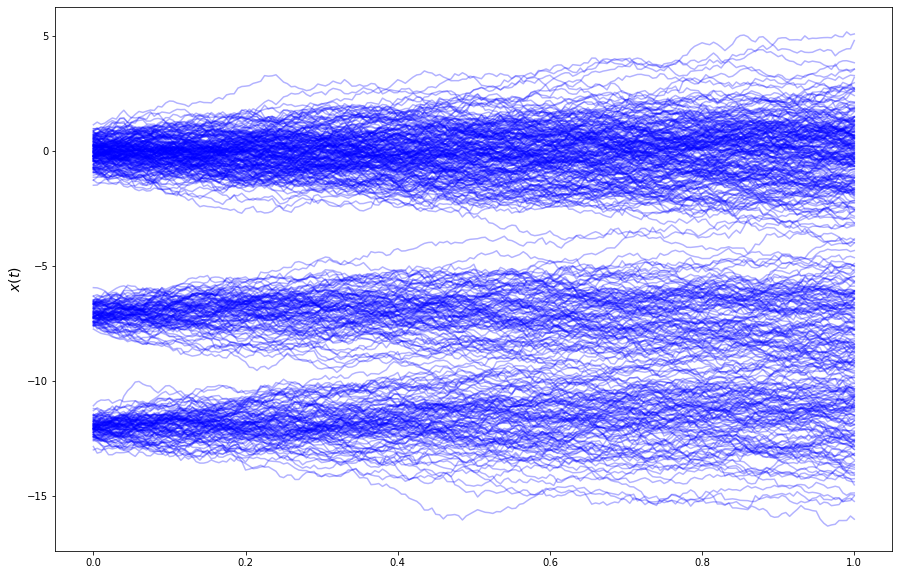

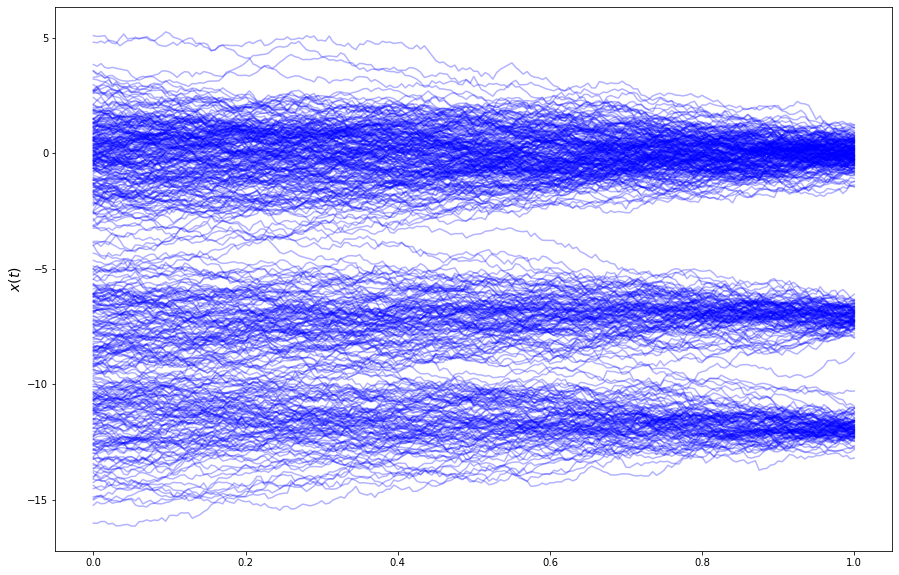

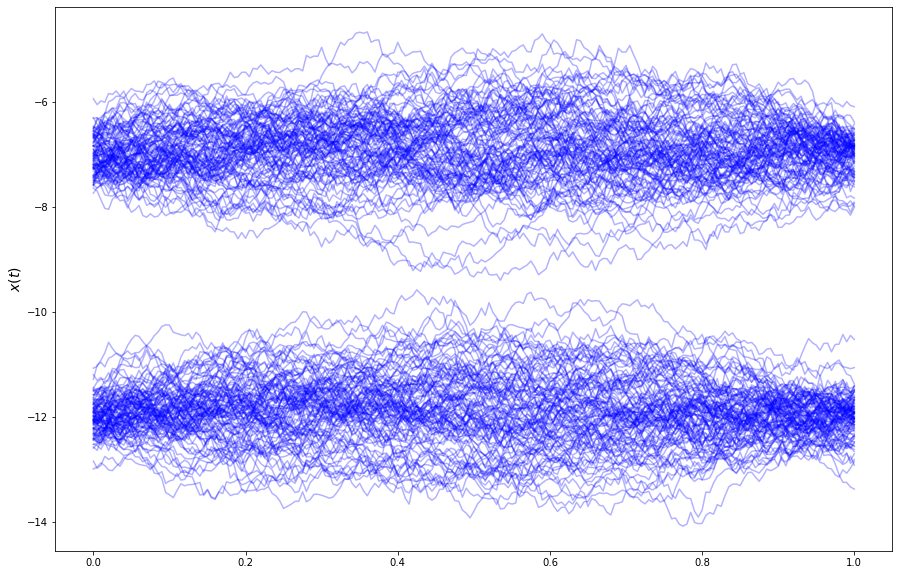

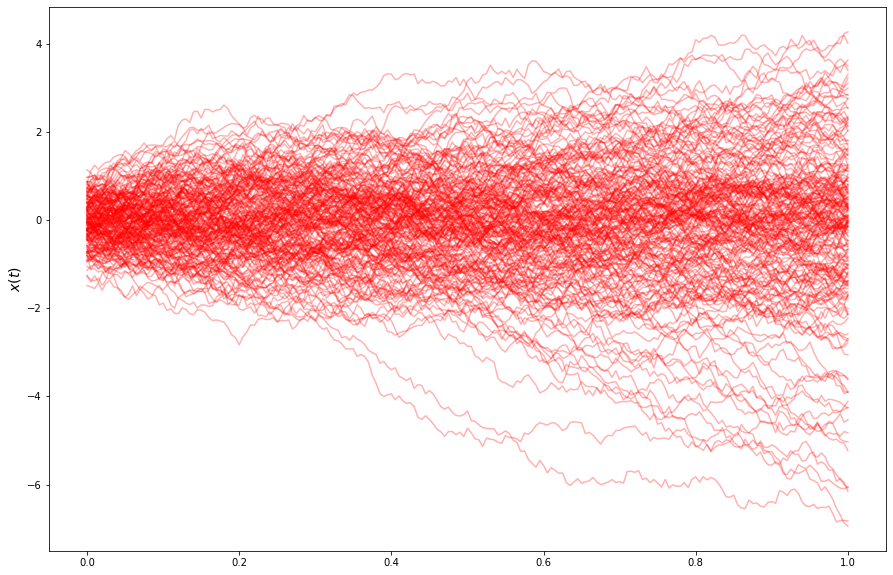

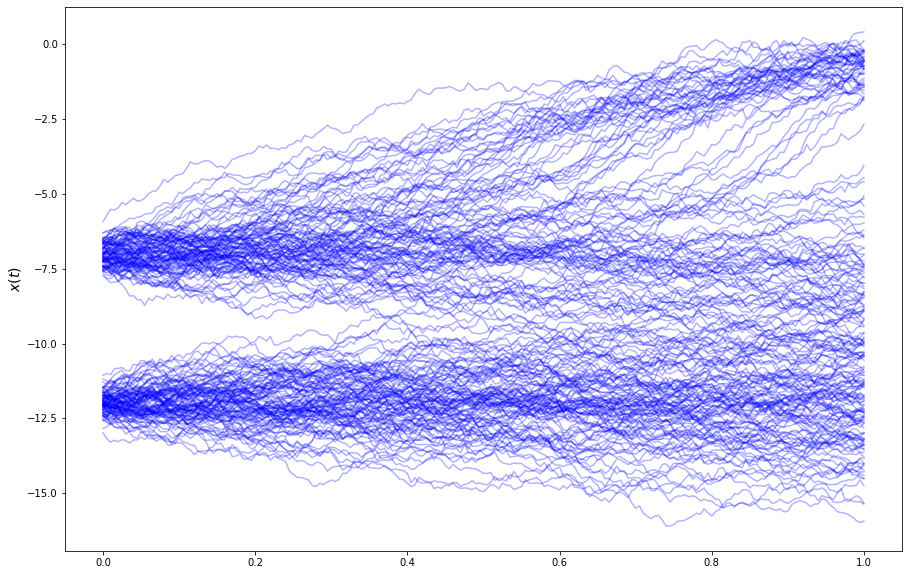

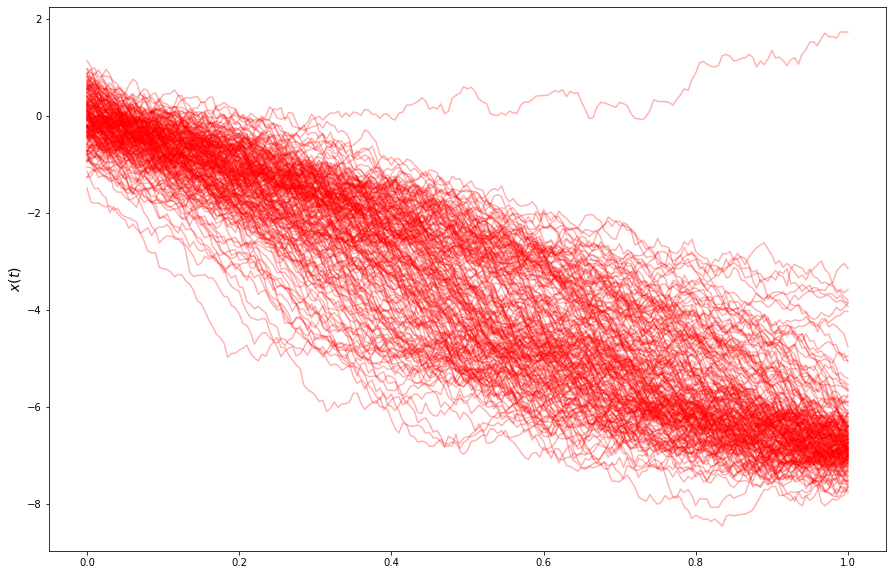

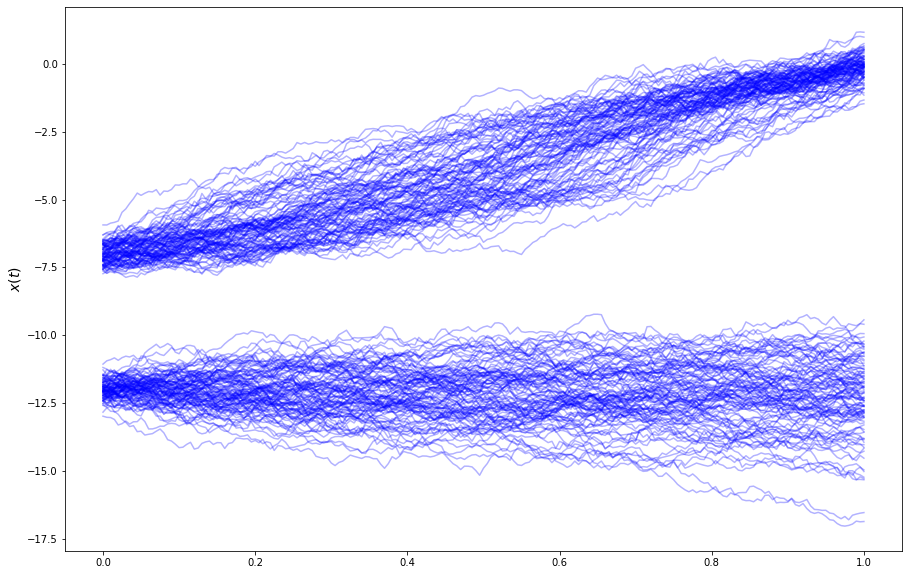

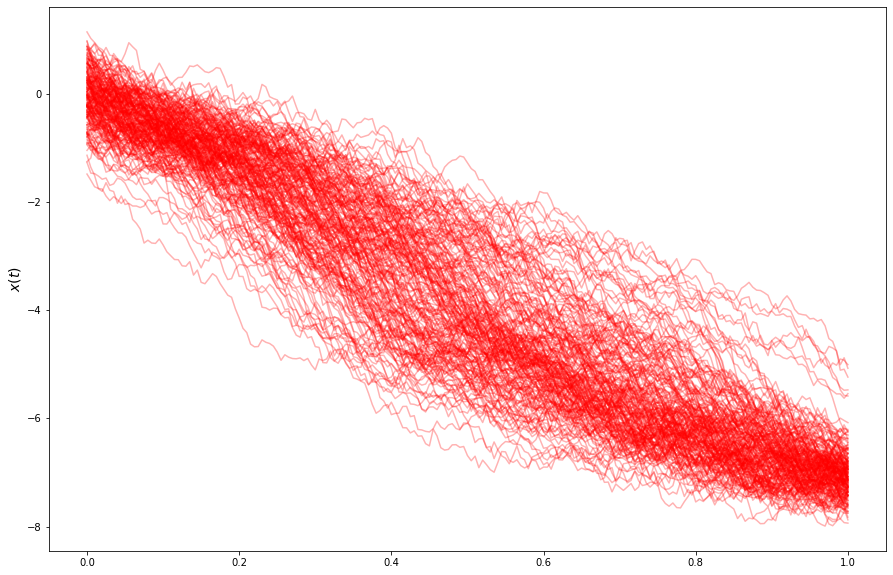

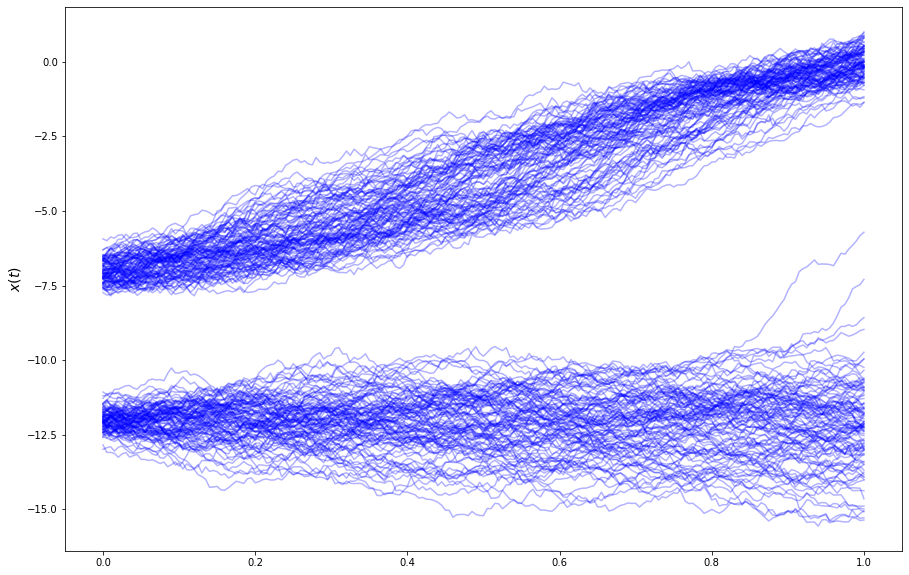

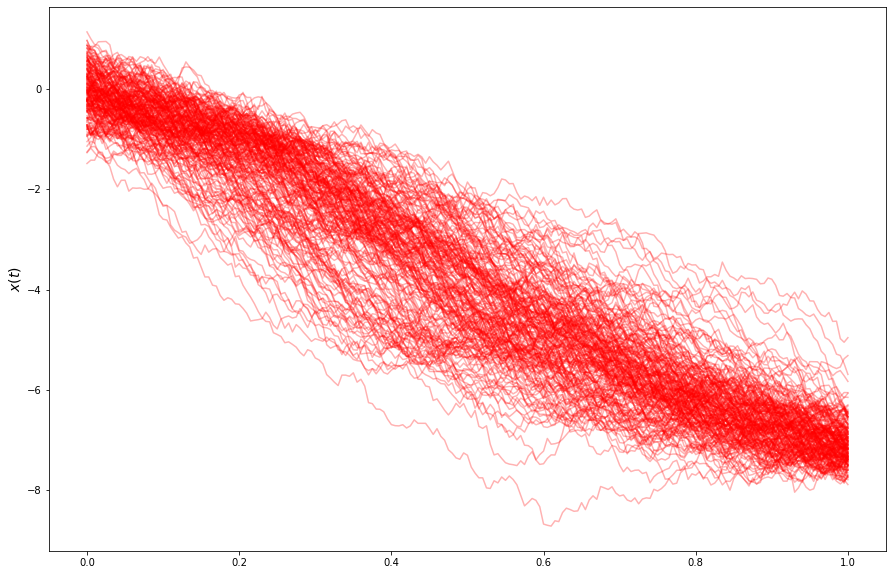

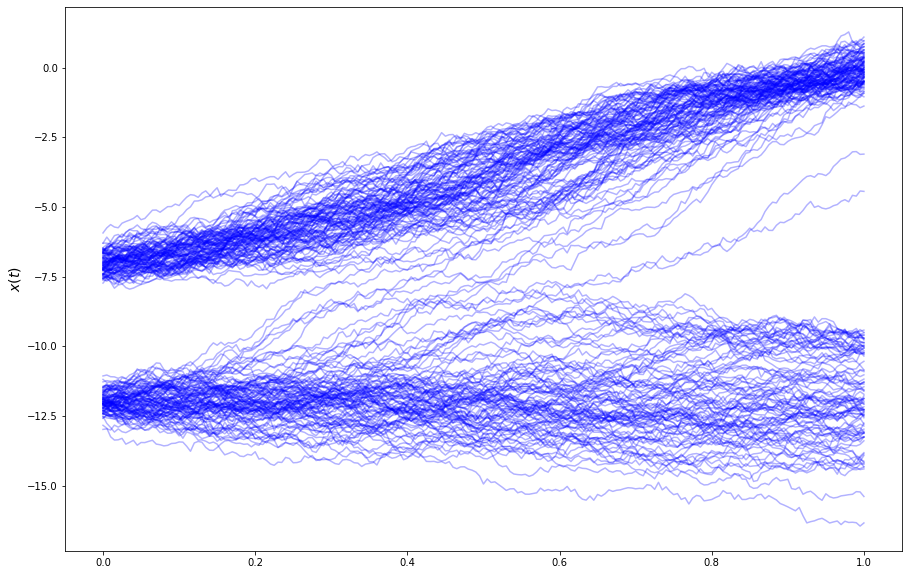

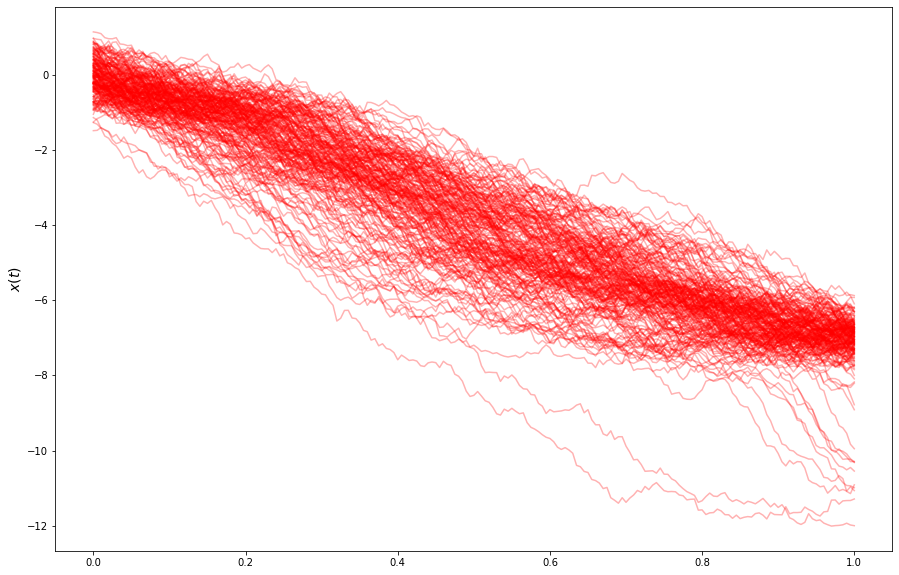

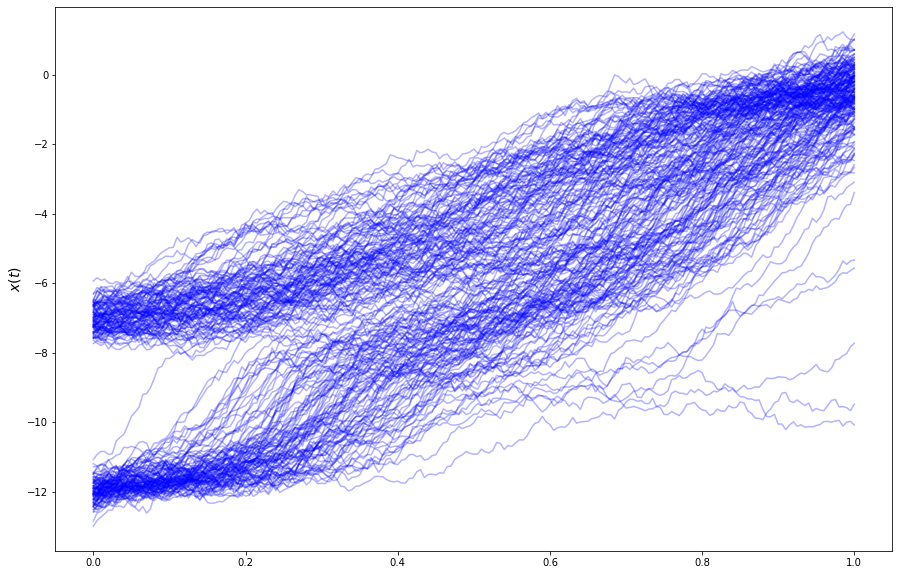

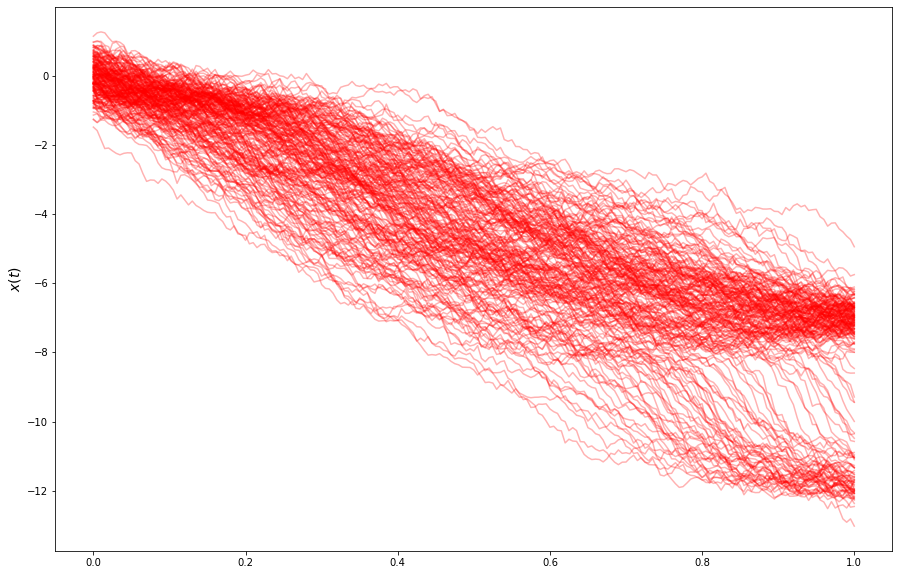

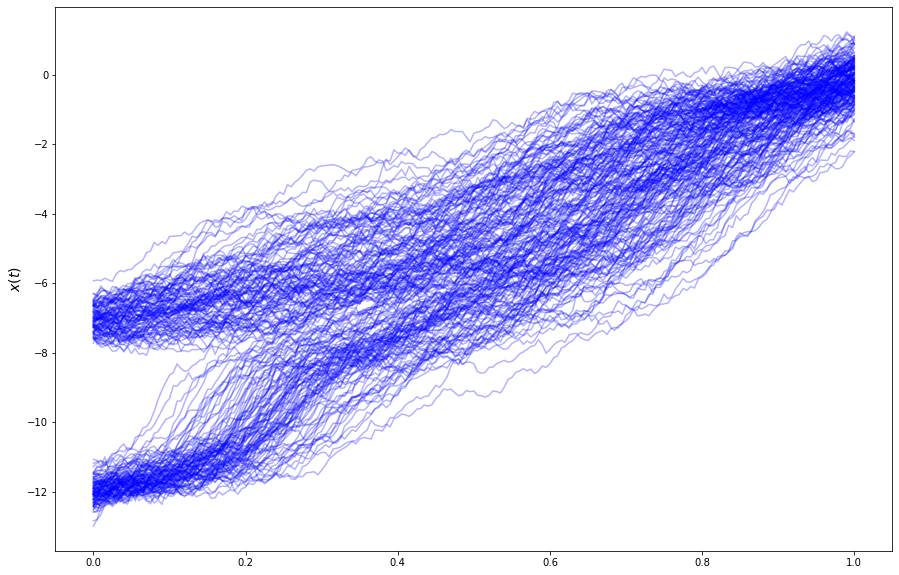

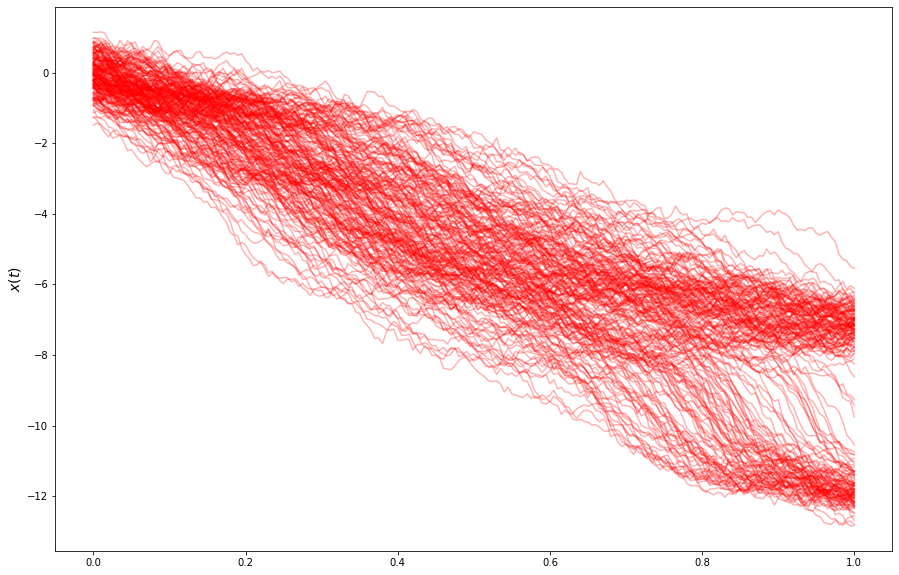

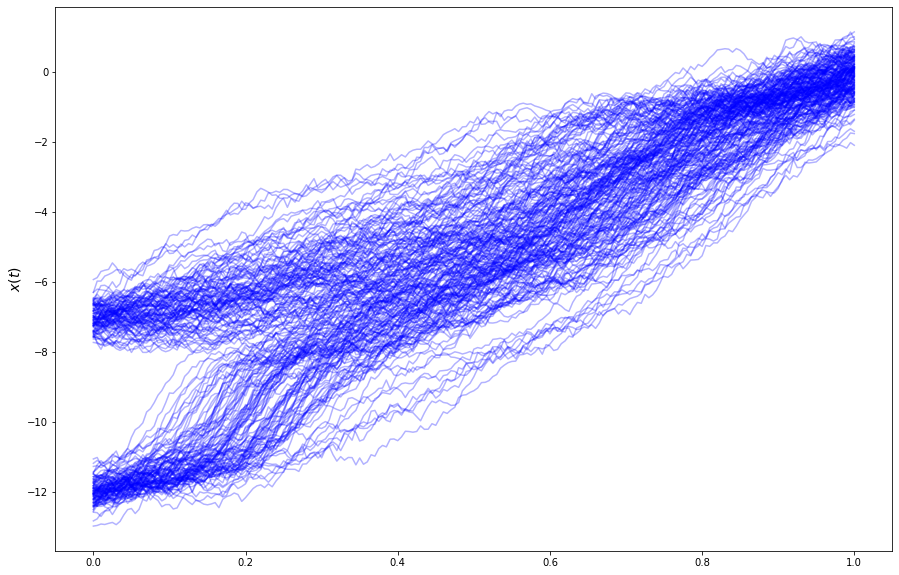

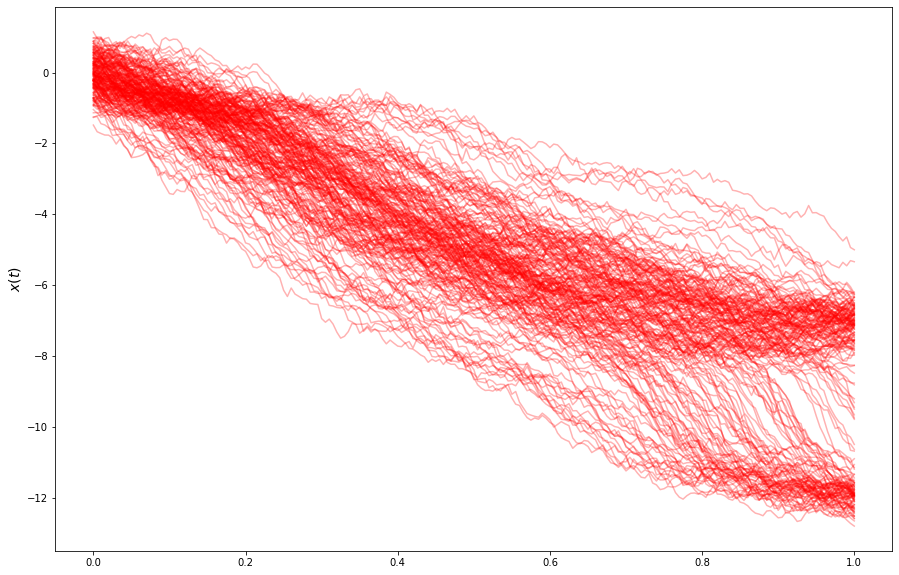

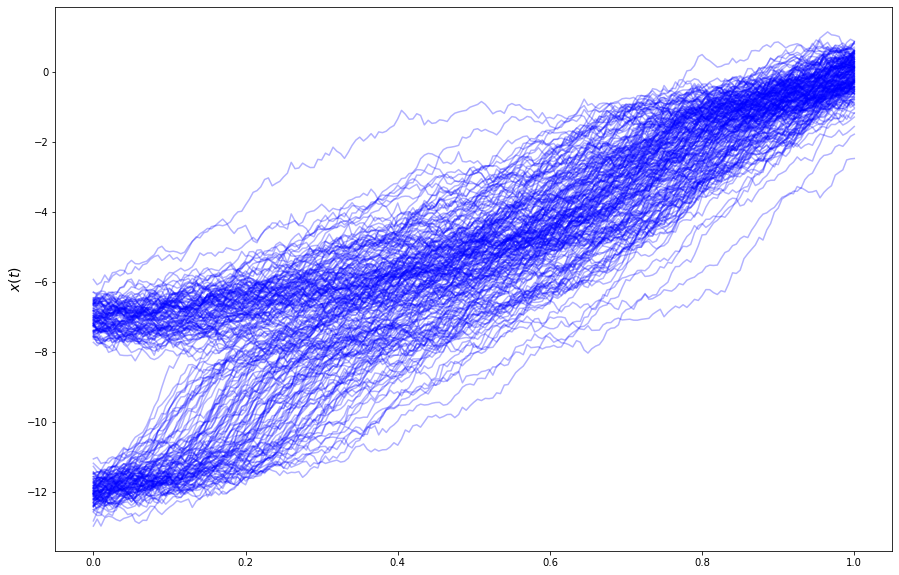

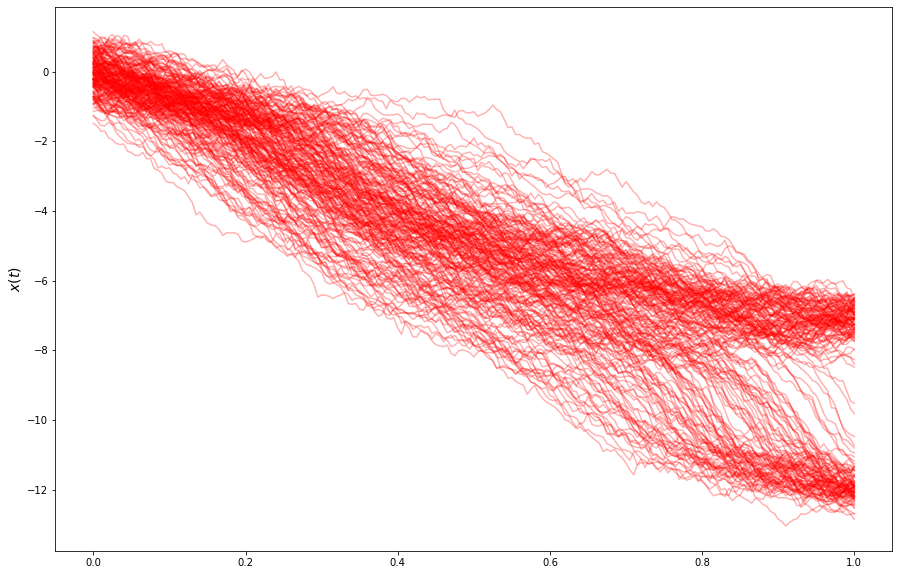

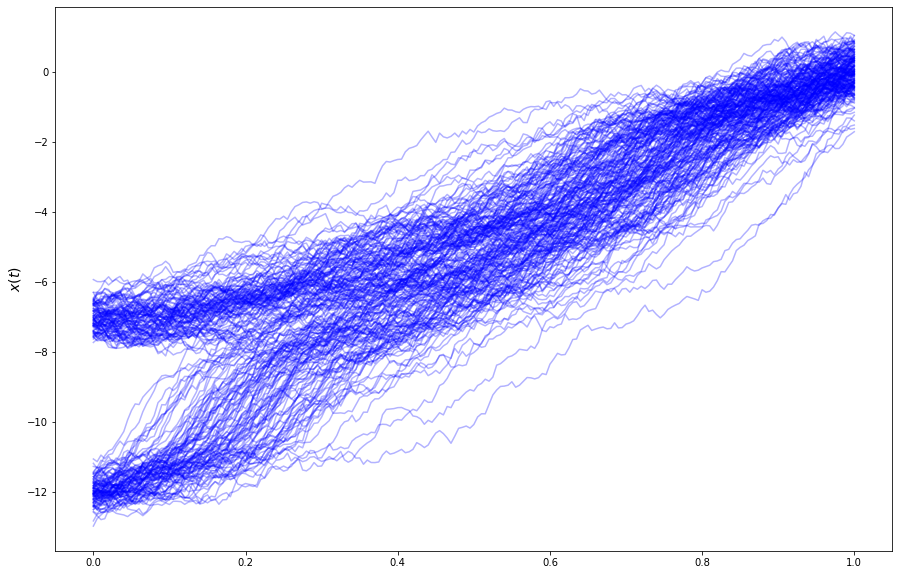

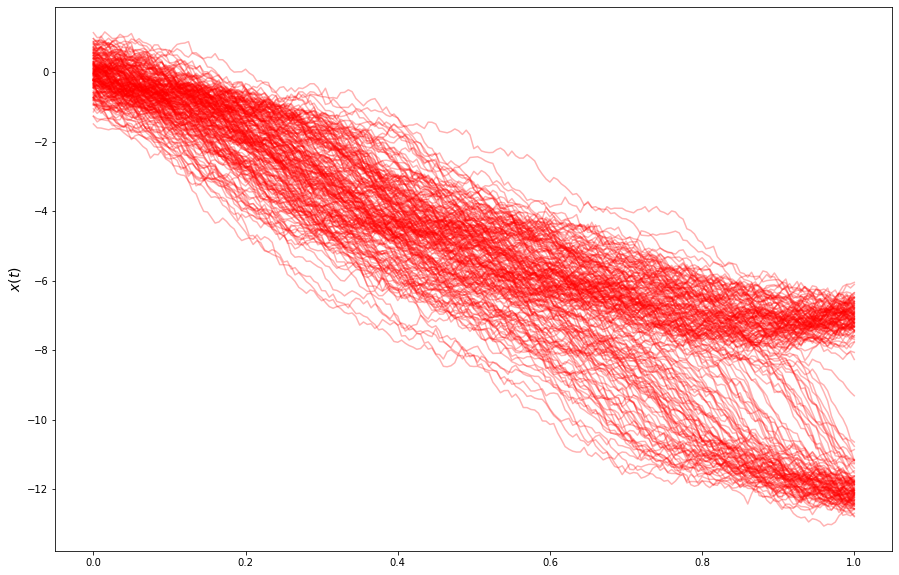

In [9]:
sigma=1.5 # Works at 1.5 breaks at 0.5, what to do ?
N=200
result = MLE_IPFP(
    X_0,X_1,prior_X_0=prior_X_0, sparse=True, num_data_points=25, num_time_points=9,sigma=sigma, N=N,
    iteration =10, plot=True
)

(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:ylabel='$x(t)$'>)

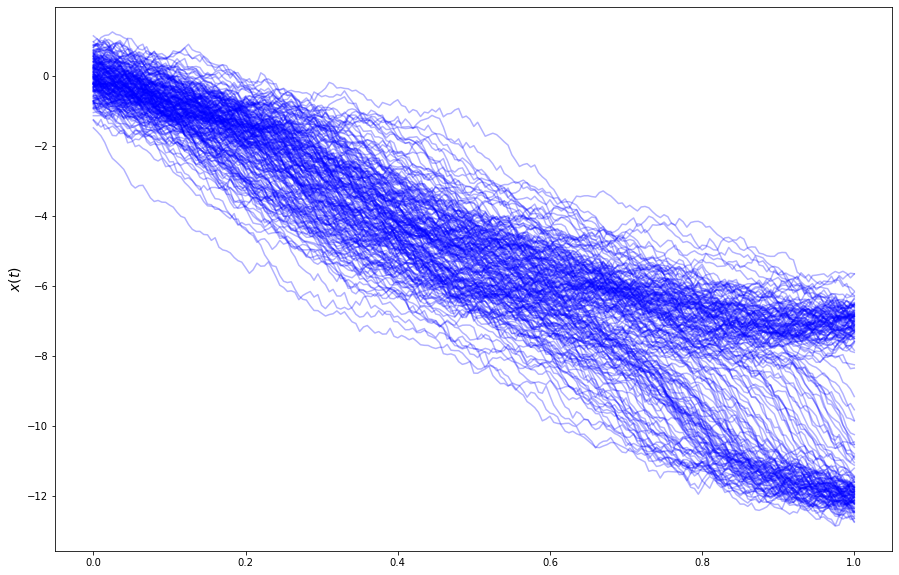

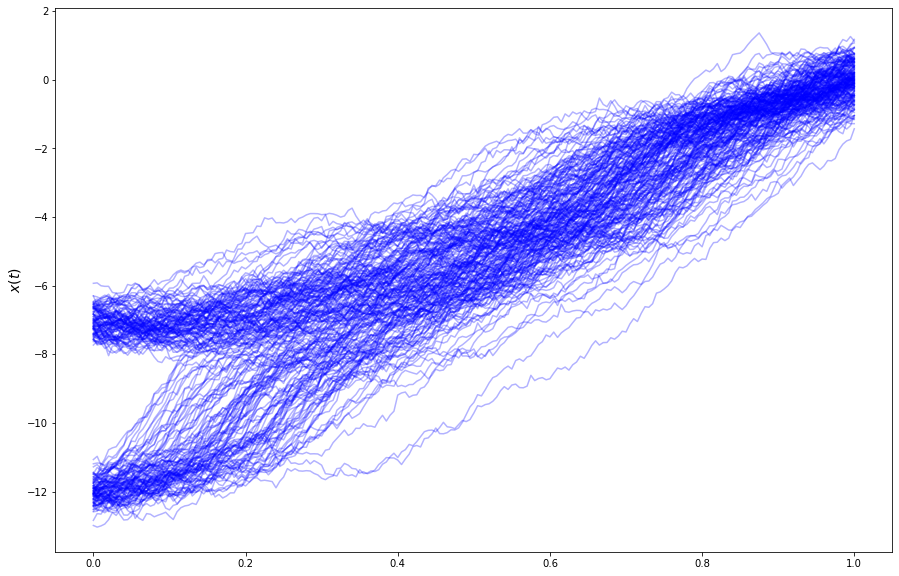

In [10]:
T,M,T2,M2 = result[-1]
plot_trajectories_2(M,T)
plot_trajectories_2(M2,  T2)